<a href="https://colab.research.google.com/github/MustafaYosoufi/Data_Visualization/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Analysis**

## **Correlation and Regression**

### **Understanding Correlation**

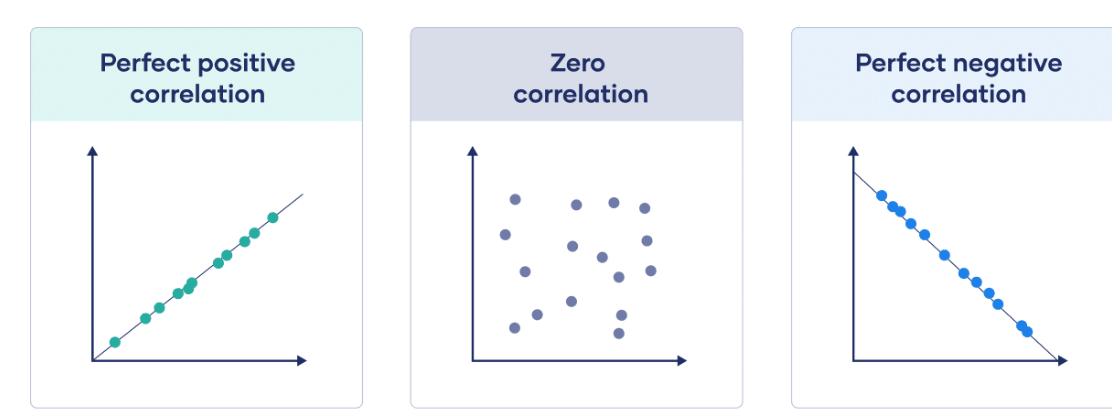

Further Reading and References: (https://www.scribbr.com/statistics/correlation-coefficient/

Correlation measures the strength and direction of a linear relationship between two variables. The correlation coefficient (denoted as 𝑟) ranges from -1 to 1:
- r=1: Perfect positive correlation
- r=−1: Perfect negative correlation
- r=0: No linear correlation

In [ ]:
import numpy as np

# Sample data
x = [10, 20, 30, 40, 50]
y = [15, 25, 35, 45, 55]

# Calculate correlation coefficient
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")


Correlation Coefficient: 1.0


**Interpretation**
A positive 𝑟 indicates that as 𝑥 increases, 𝑦 tends to increase.
A negative 𝑟 suggests that as 𝑥 increases, 𝑦 tends to decrease.

**Visual Representation**

A scatter plot can help visualize the relationship between two variables.

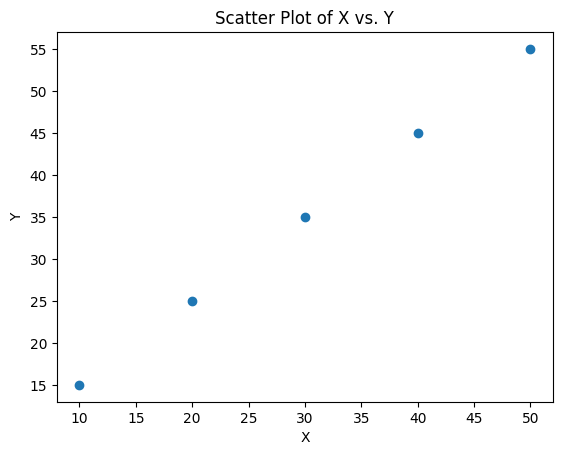

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title('Scatter Plot of X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


### **Simple Linear Regression**

Regression analyzes the relationship between a dependent variable and one or more independent variables. Simple Linear Regression involves one independent variable and models the relationship as:

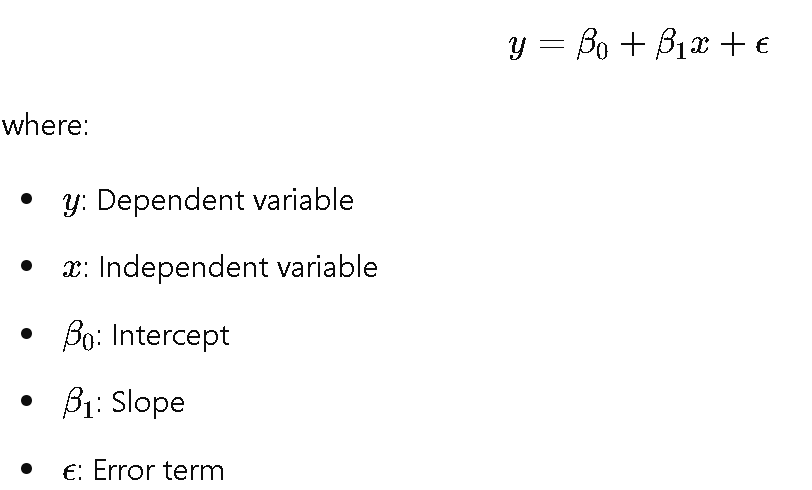

Intercept: 5.0
Slope: 1.0


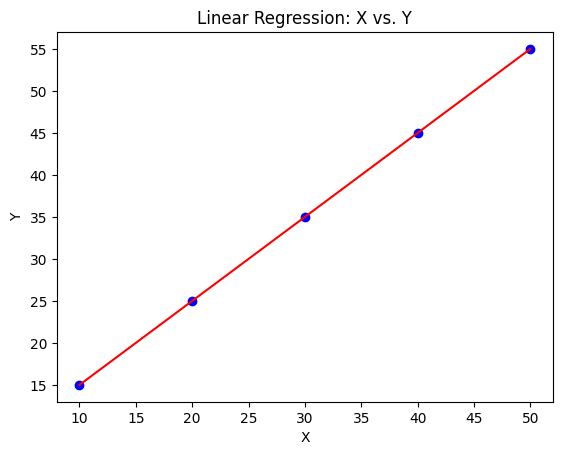

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reshape data for sklearn
x = np.array(x).reshape(-1, 1)
y = np.array(y)

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Predicting values
y_pred = model.predict(x)

# Plotting regression line
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title('Linear Regression: X vs. Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


**Interpretation**

The slope (𝛽1) indicates the change in
𝑦
for a one-unit increase in
𝑥. The intercept (
𝛽
0) represents the expected value of
𝑦 when
𝑥
=
0.

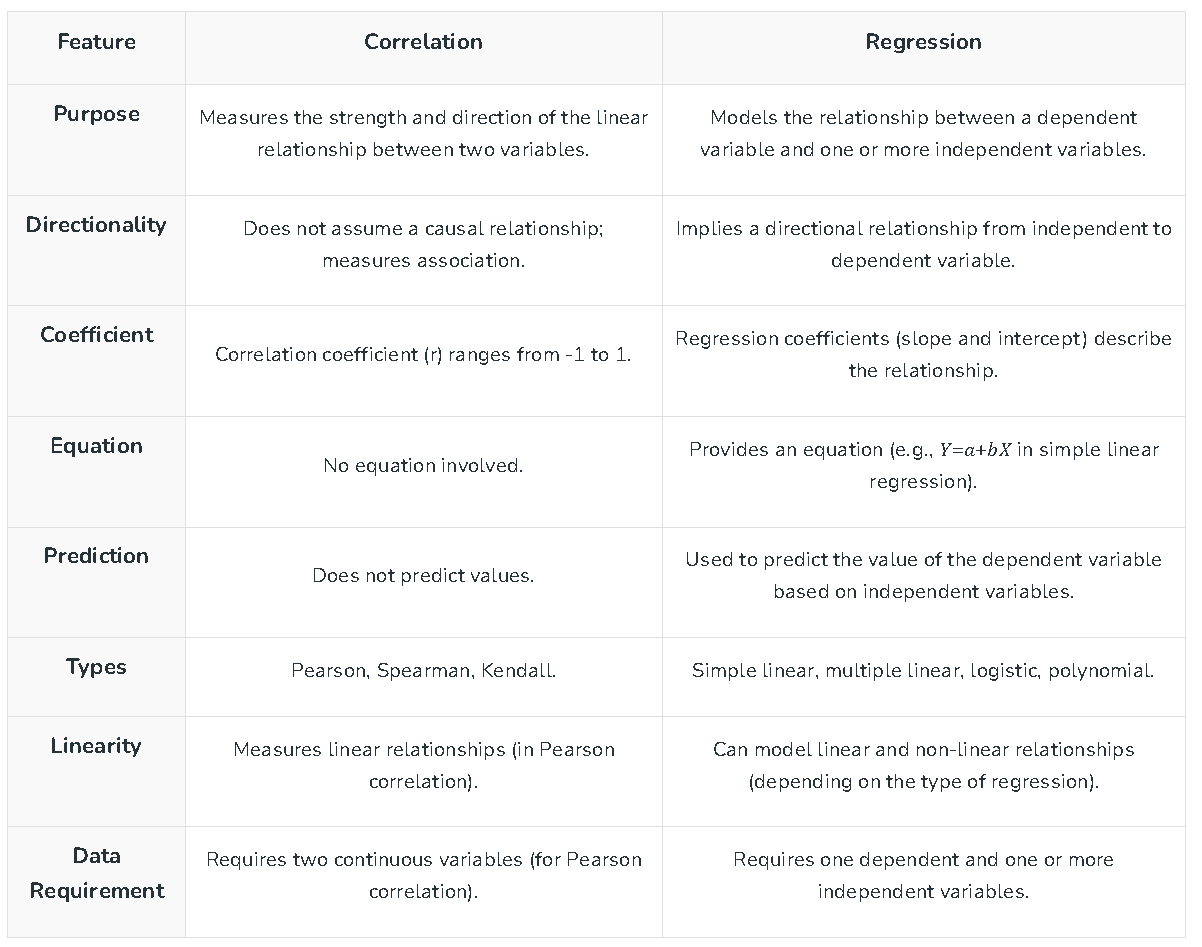

In [ ]:
import pandas as pd
import numpy as np
die = pd.DataFrame({
    'number': [1, 2, 3, 4, 5, 6],
    'prob': [1/6] * 6
})
rolls_10 = die.sample(n=100, replace=True, weights=die['prob'])
print(rolls_10)

    number      prob
2        3  0.166667
5        6  0.166667
1        2  0.166667
1        2  0.166667
2        3  0.166667
..     ...       ...
4        5  0.166667
5        6  0.166667
3        4  0.166667
3        4  0.166667
5        6  0.166667

[100 rows x 2 columns]


## **Linear Regression**

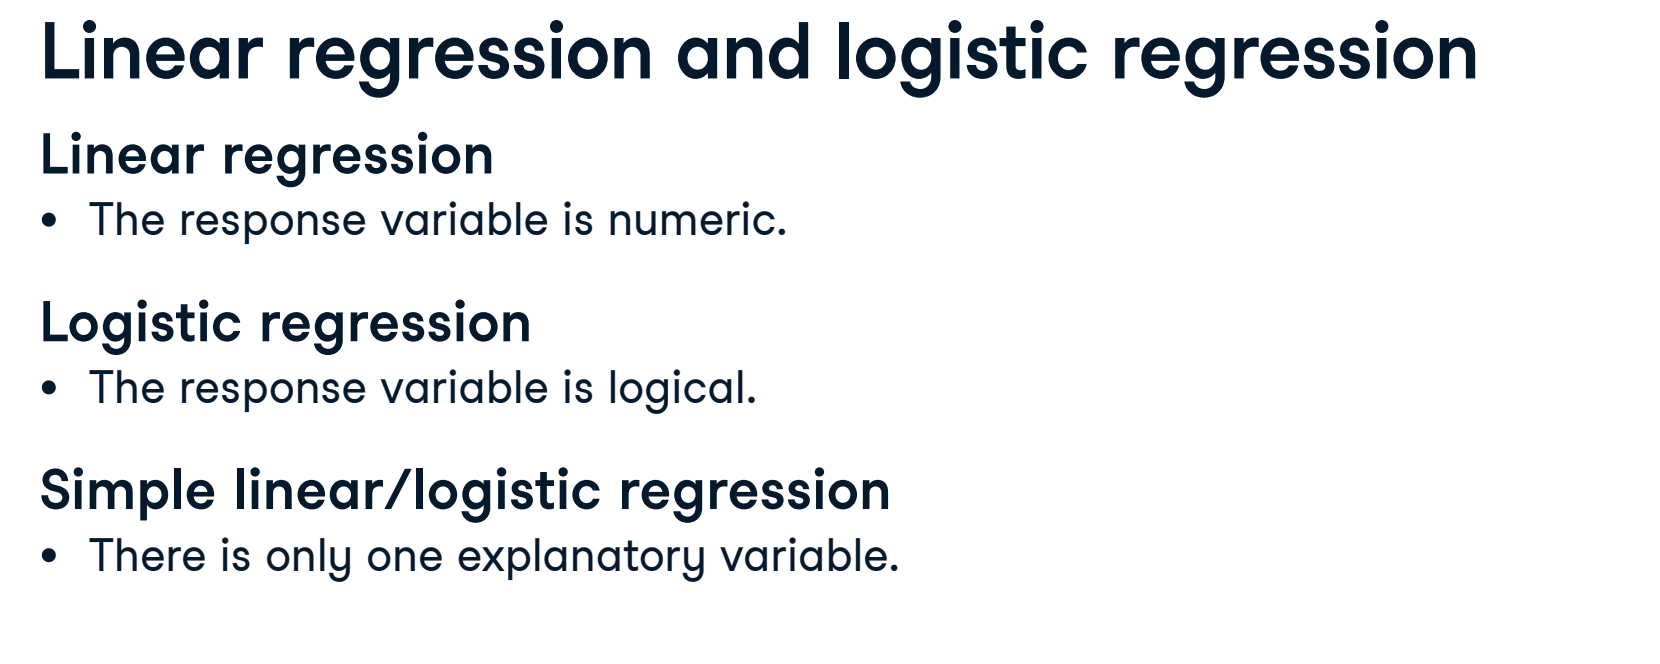

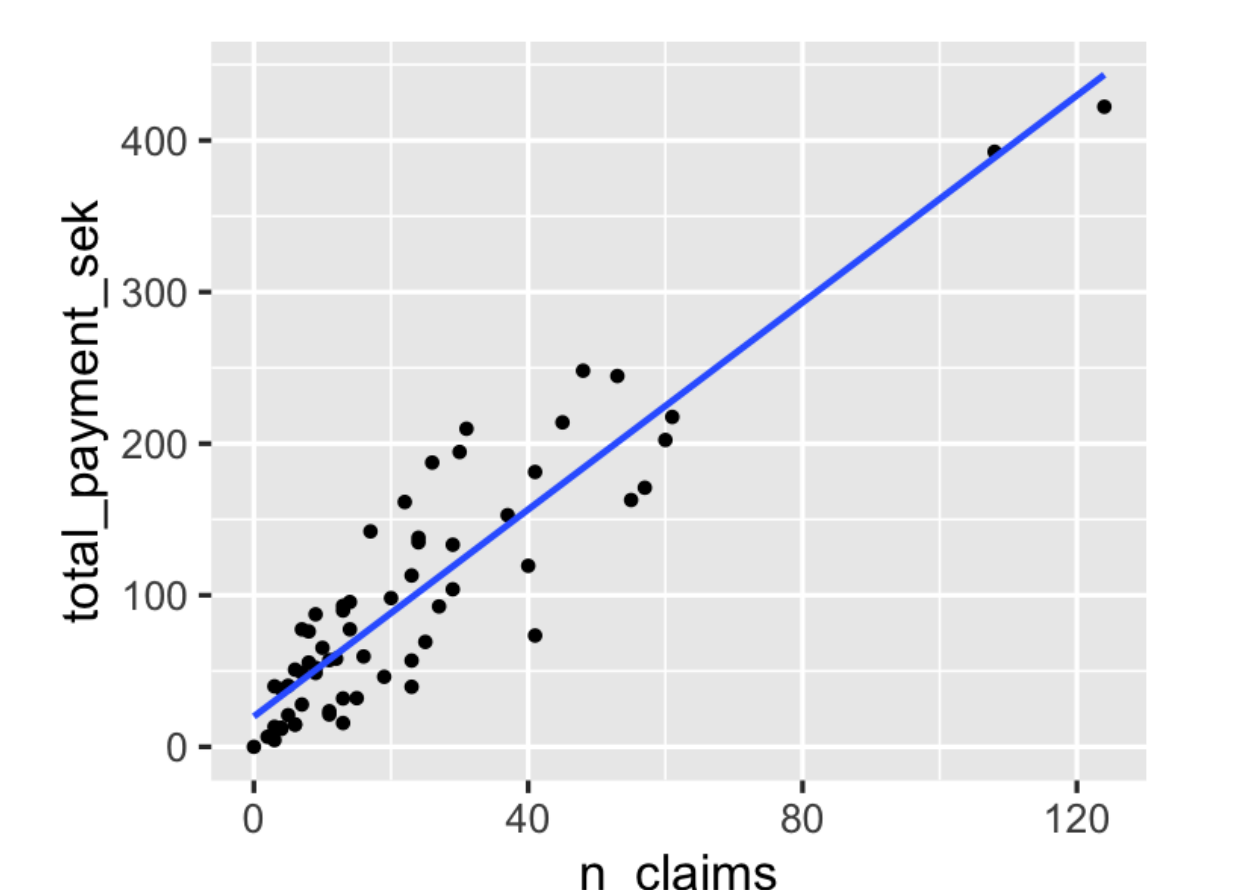

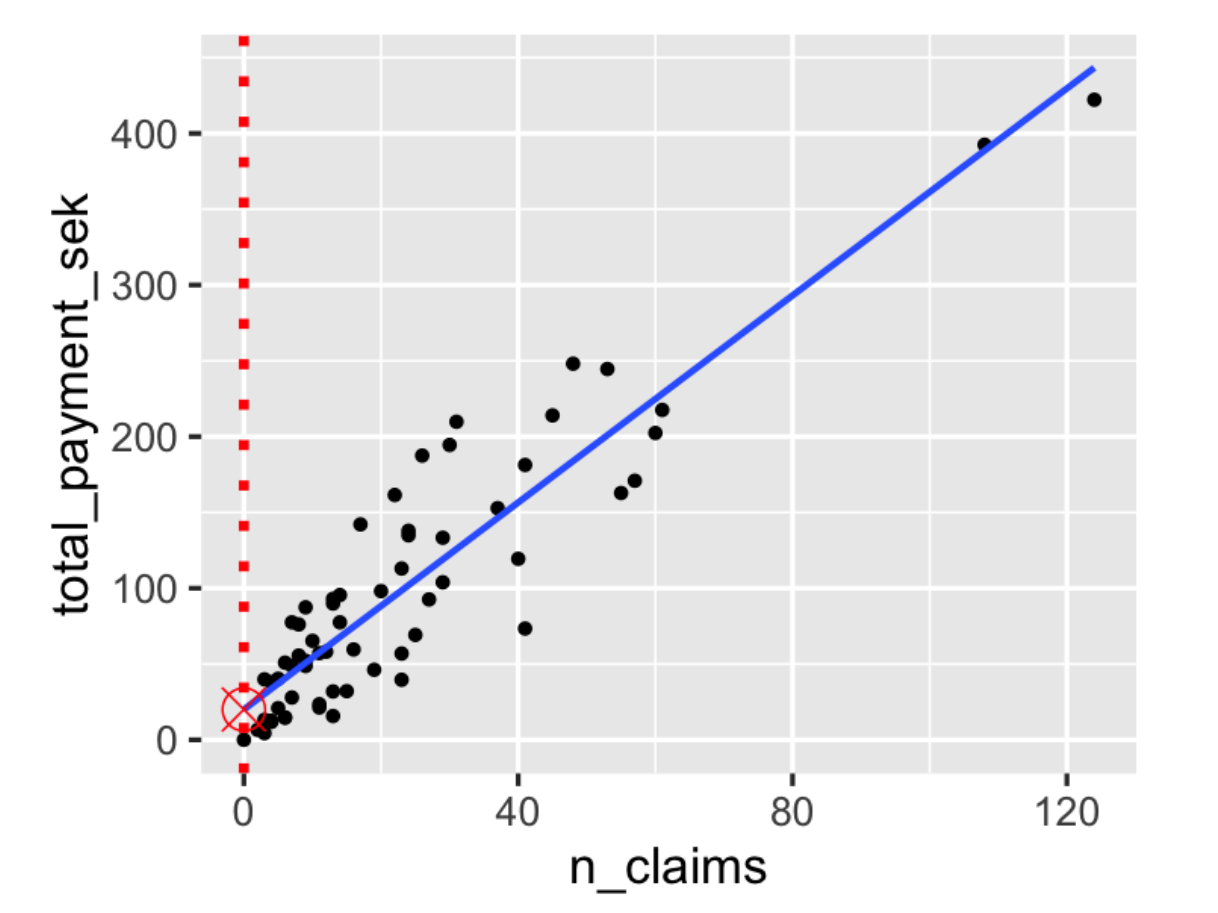

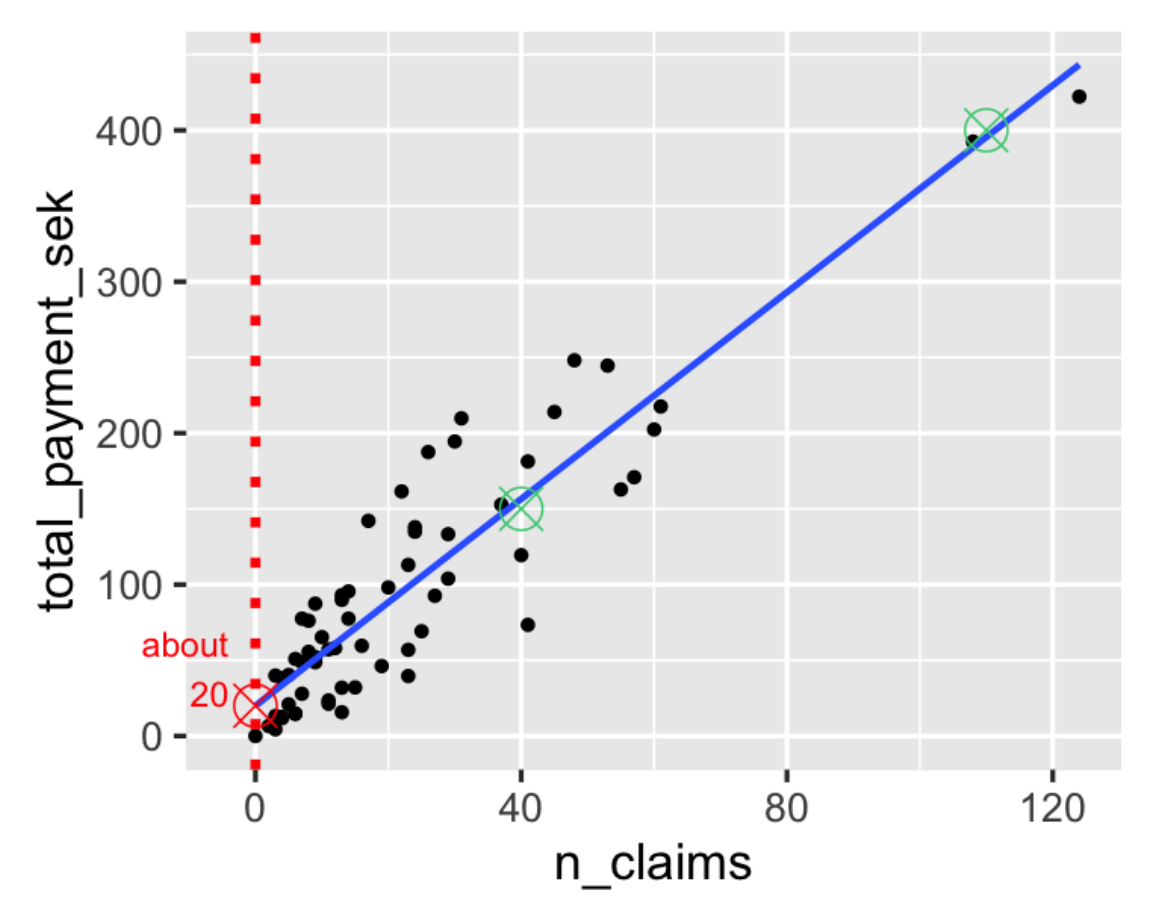

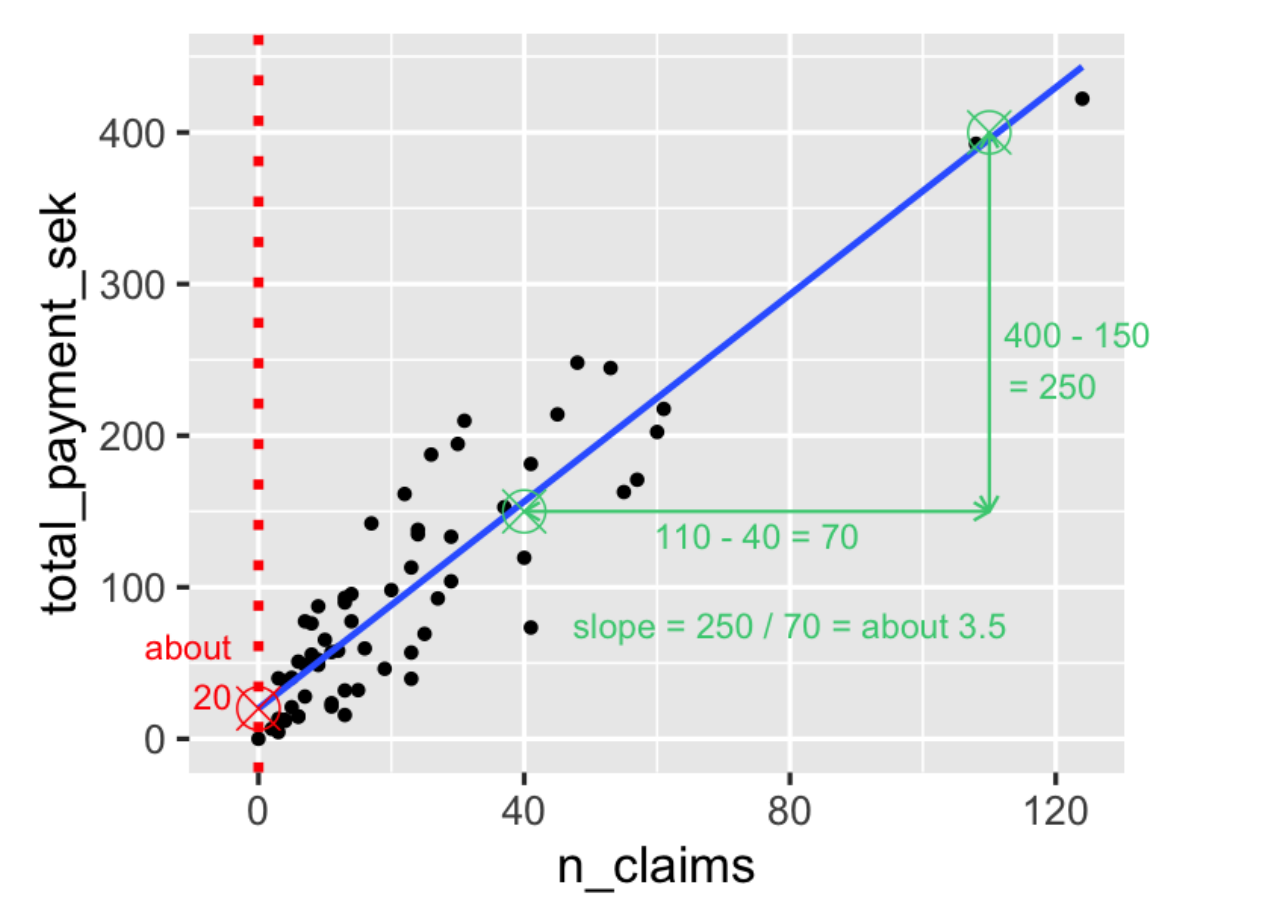

In [ ]:
import pandas as pd
fishes = pd.read_csv('/content/fish (1).csv')
fishes

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
...,...,...,...
123,Pike,950.0,48.3
124,Pike,1250.0,52.0
125,Pike,1600.0,56.0
126,Pike,1550.0,56.0


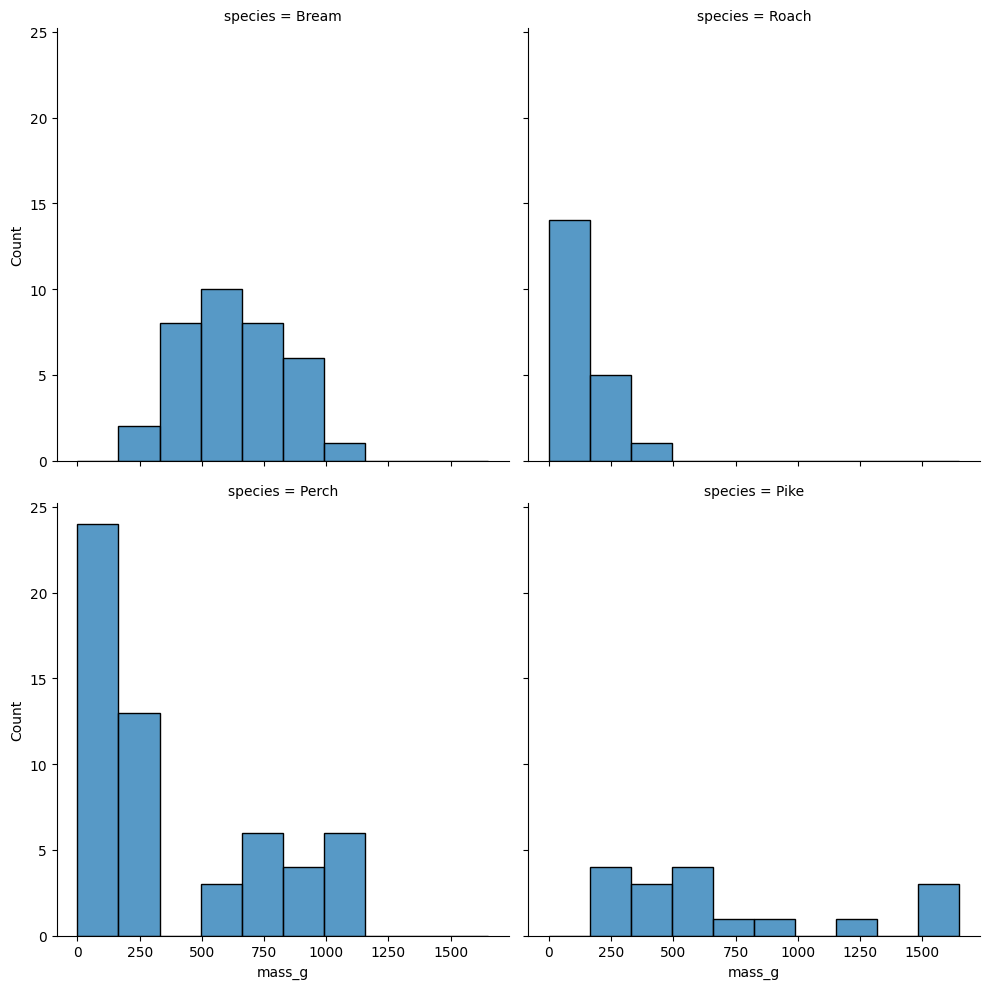

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data = fishes, x = "mass_g", col = 'species', col_wrap = 2, bins = 10)
plt.show()

In [ ]:
summary_stats = fishes.groupby('species')['mass_g'].mean()
summary_stats

,mass_g
species,
Bream,617.828571
Perch,382.239286
Pike,718.705882
Roach,152.050000


In [ ]:
from statsmodels.formula.api import ols
model_mass_vs_species = ols('mass_g ~ species', data = fishes).fit()
print(model_mas_vs_species.params)

Intercept           617.828571
species[T.Perch]   -235.589286
species[T.Pike]     100.877311
species[T.Roach]   -465.778571
dtype: float64


In [ ]:
bream = fishes[fishes['species'] == 'Bream']
bream

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5
5,Bream,450.0,26.8
6,Bream,500.0,26.8
7,Bream,390.0,27.6
8,Bream,450.0,27.6
9,Bream,500.0,28.5


<Axes: xlabel='length_cm', ylabel='mass_g'>

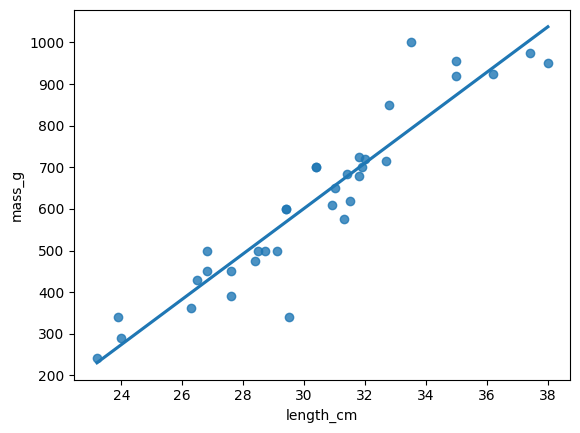

In [ ]:
sns.regplot(x = 'length_cm', y = 'mass_g', data = bream, ci = None)

In [ ]:
model_mass_vs_length = ols('mass_g ~ length_cm', data = bream).fit()
print(model_mass_vs_length.params)

Intercept   -1035.347565
length_cm      54.549981
dtype: float64


In [ ]:
import numpy as np
explanatory_data = pd.DataFrame({'length_cm': np.arange(20, 41)})
explanatory_data

,length_cm
0,20
1,21
2,22
3,23
4,24
5,25
6,26
7,27
8,28
9,29


In [ ]:
print(model_mass_vs_length.predict(explanatory_data))

0       55.652054
1      110.202035
2      164.752015
3      219.301996
4      273.851977
5      328.401958
6      382.951939
7      437.501920
8      492.051901
9      546.601882
10     601.151863
11     655.701844
12     710.251825
13     764.801806
14     819.351787
15     873.901768
16     928.451749
17     983.001730
18    1037.551710
19    1092.101691
20    1146.651672
dtype: float64


In [ ]:
prediction_data = explanatory_data.assign(mass_g = model_mass_vs_length.predict(explanatory_data))
prediction_data

,length_cm,mass_g
0,20,55.652054
1,21,110.202035
2,22,164.752015
3,23,219.301996
4,24,273.851977
5,25,328.401958
6,26,382.951939
7,27,437.501920
8,28,492.051901
9,29,546.601882


<Axes: xlabel='length_cm', ylabel='mass_g'>

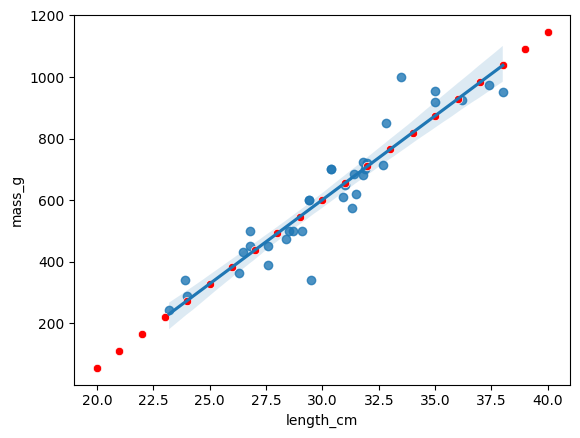

In [ ]:
sns.regplot(x = 'length_cm', y = 'mass_g',  data = bream)
sns.scatterplot(x = 'length_cm', y = 'mass_g', data = prediction_data, color = 'red')

In [ ]:
print(model_mass_vs_length.resid)

0      11.788007
1      16.148023
2      71.603021
3     -36.316934
4      19.773070
5      23.408076
6      73.408076
7     -80.231909
8     -20.231909
9     -19.326892
10    -38.871893
11    -30.236888
12    -52.056880
13   -233.876873
14     31.578126
15     31.578126
16     77.028145
17     77.028145
18    -40.246846
19     -5.701844
20    -97.066838
21      7.478164
22    -62.976834
23    -19.341829
24     -4.796827
25     25.658171
26      9.748175
27    -34.436811
28     96.108190
29    207.923204
30     46.098232
31     81.098232
32    -14.361745
33    -29.821722
34    -87.551710
dtype: float64


In [ ]:
mean_of_residuals = np.mean(model_mass_vs_length.resid)
mean_of_residuals

-7.665741057800395e-13

## **Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

bank_data = pd.read_csv('/content/churn (1).csv')
bank_data

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
...,...,...,...
395,1,1.077655,0.878567
396,1,-1.273770,-0.869016
397,1,-0.426195,0.684666
398,1,0.818836,1.428091


In [ ]:
model_churn_vs_recency_lm = ols('has_churned ~ time_since_last_purchase', data = bank_data).fit()
print(model_churn_vs_recency_lm.params)

Intercept                   0.490780
time_since_last_purchase    0.063783
dtype: float64


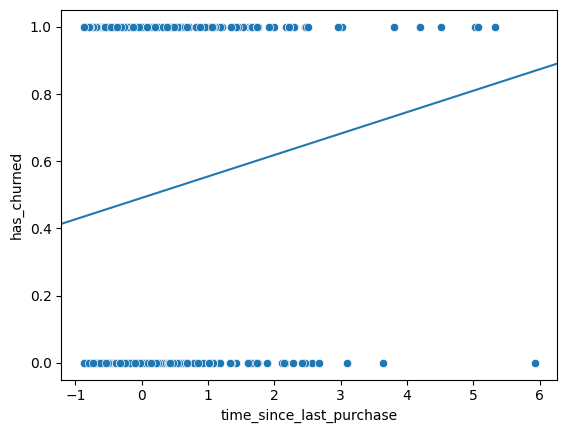

In [ ]:
intercept, slope = model_churn_vs_recency_lm.params
sns.scatterplot(x = 'time_since_last_purchase', y = 'has_churned', data = bank_data)

plt.axline(xy1 = (0, intercept), slope = slope)

plt.show()

In [ ]:
from statsmodels.formula.api import logit
model_churn_vs_recency_logit = logit('has_churned ~ time_since_last_purchase', data = bank_data).fit()
print(model_churn_vs_recency_logit.params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


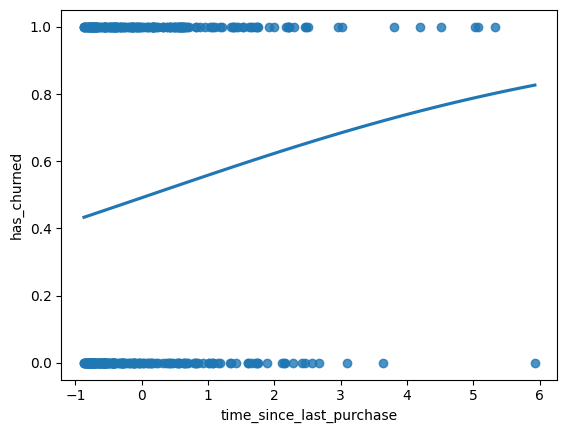

In [ ]:
sns.regplot(x = 'time_since_last_purchase', y = 'has_churned', data = bank_data, ci = None, logistic = True)
#plt.axline(xy1 = (0, intercept), slope = slope, color = 'red')

#plt.xlim(-10, 10)
#plt.ylim(-0.2, 1.2)
plt.show()

In [ ]:
model_recency = logit('has_churned ~ time_since_last_purchase', data = bank_data).fit()

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


In [ ]:
explanatory_data = pd.DataFrame({'time_since_last_purchase': np.arange(-1,  6.25, 0.25)})
explanatory_data

,time_since_last_purchase
0,-1.00
1,-0.75
2,-0.50
3,-0.25
4,0.00
5,0.25
6,0.50
7,0.75
8,1.00
9,1.25


In [ ]:
prediction_data = explanatory_data.assign(has_churned = model_recency.predict(explanatory_data))
prediction_data

,time_since_last_purchase,has_churned
0,-1.00,0.424523
1,-0.75,0.441043
2,-0.50,0.457695
3,-0.25,0.474441
4,0.00,0.491246
5,0.25,0.508070
6,0.50,0.524876
7,0.75,0.541626
8,1.00,0.558283
9,1.25,0.574809


<Axes: xlabel='time_since_last_purchase', ylabel='has_churned'>

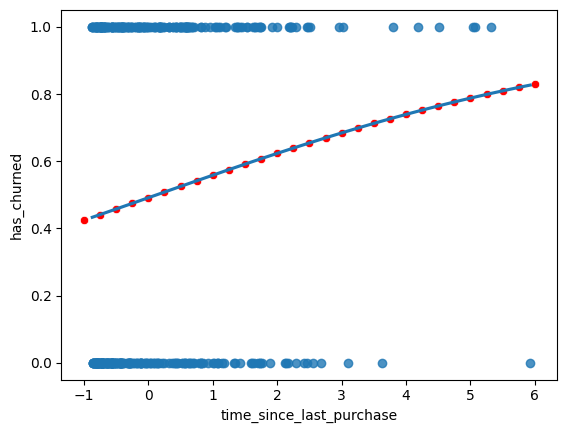

In [ ]:
sns.regplot(x = 'time_since_last_purchase', y = 'has_churned', data = bank_data, ci = None, logistic = True)
sns.scatterplot(x = 'time_since_last_purchase', y = 'has_churned', data = prediction_data, color = 'red')

In [ ]:
prediction_data['most_likely_outcome'] = np.round(prediction_data['has_churned'])
prediction_data

,time_since_last_purchase,has_churned,most_likely_outcome
0,-1.00,0.424523,0.0
1,-0.75,0.441043,0.0
2,-0.50,0.457695,0.0
3,-0.25,0.474441,0.0
4,0.00,0.491246,0.0
5,0.25,0.508070,1.0
6,0.50,0.524876,1.0
7,0.75,0.541626,1.0
8,1.00,0.558283,1.0
9,1.25,0.574809,1.0


<Axes: xlabel='time_since_last_purchase', ylabel='has_churned'>

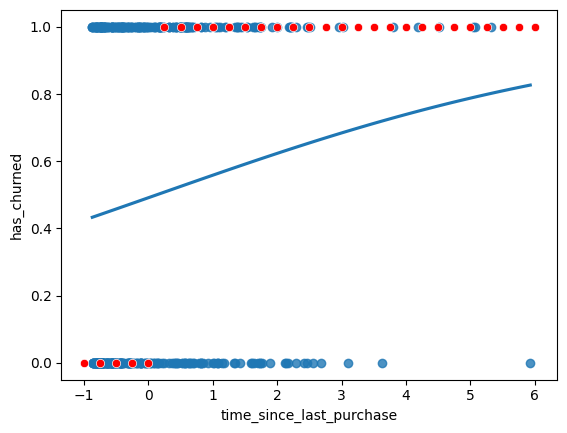

In [ ]:
sns.regplot(x = 'time_since_last_purchase', y = 'has_churned', data = bank_data, ci = None, logistic = True)
sns.scatterplot(x = 'time_since_last_purchase', y = 'most_likely_outcome', data = prediction_data, color = 'red')

## **Odds Ratios**

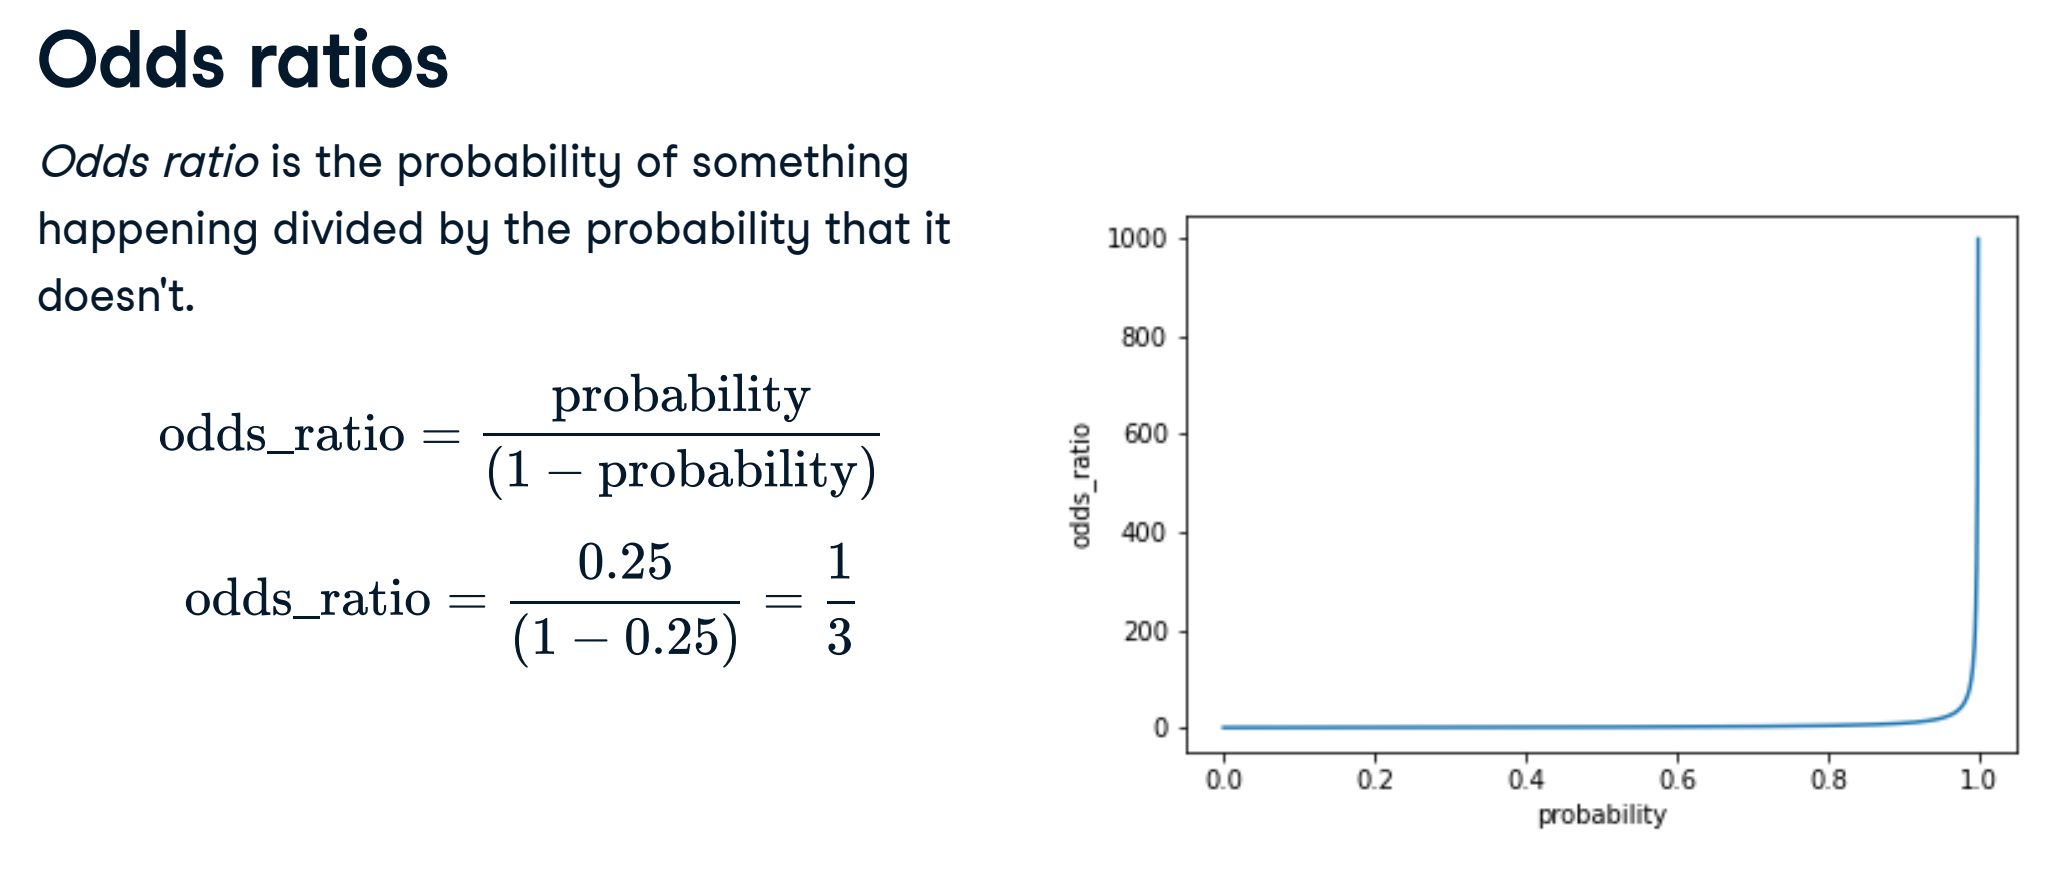

In [ ]:
prediction_data['odd_ratio'] = prediction_data['has_churned']/(1 - prediction_data['has_churned'])

<Axes: xlabel='time_since_last_purchase', ylabel='odd_ratio'>

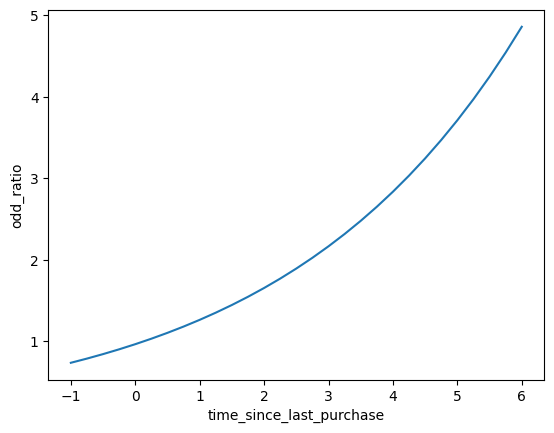

In [ ]:
sns.lineplot(x = 'time_since_last_purchase', y = 'odd_ratio', data = prediction_data)

## **Confusion Matrix**

In [ ]:
actual_response = bank_data['has_churned']
actual_response

,has_churned
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,1


In [ ]:
predicted_response = prediction_data['has_churned']
predicted_response = np.round(model_recency.predict())
outcomes = pd.DataFrame({'Actual': actual_response, 'Predicted': predicted_response})
outcomes

,Actual,Predicted
0,0,0.0
1,0,1.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
395,1,1.0
396,1,0.0
397,1,1.0
398,1,1.0


In [ ]:
outcomes.value_counts(sort = False)

Actual  Predicted
0       0.0          141
        1.0           59
1       0.0          111
        1.0           89
Name: count, dtype: int64

In [ ]:
confusion_matrix = model_recency.pred_table()
confusion_matrix

array([[141.,  59.],
       [111.,  89.]])

(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

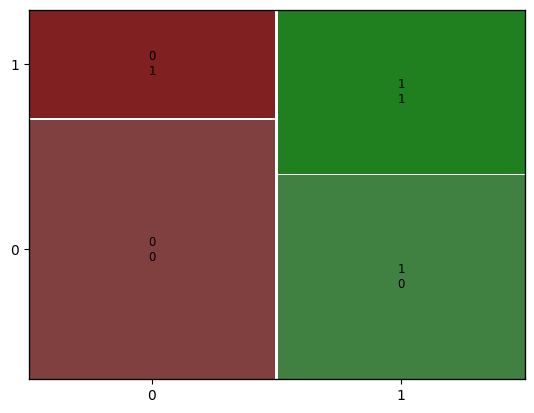

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(confusion_matrix)

## **Accuracy**

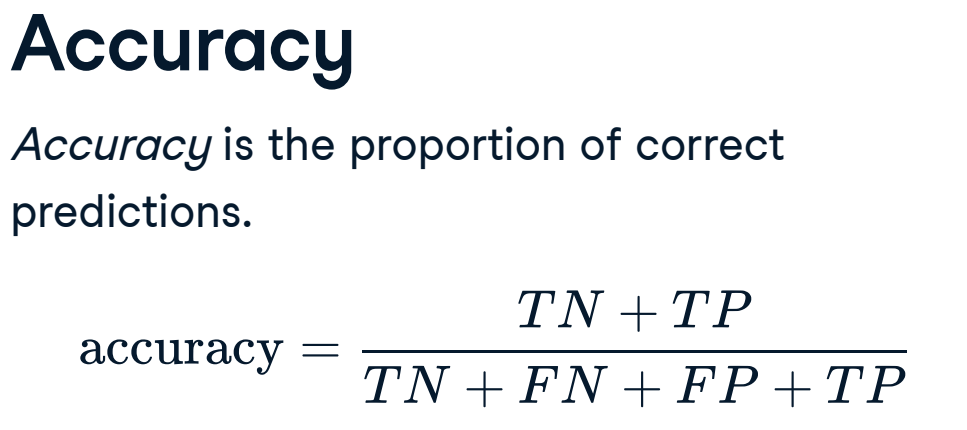

In [ ]:
TN = confusion_matrix[0,0]
FN = confusion_matrix[1,0]
FP = confusion_matrix[0,1]
TP = confusion_matrix[1,1]

In [ ]:
accuracy = (TN + TP)/(TN + TP + FN + FP)
accuracy

0.575

## **Sensitivity**

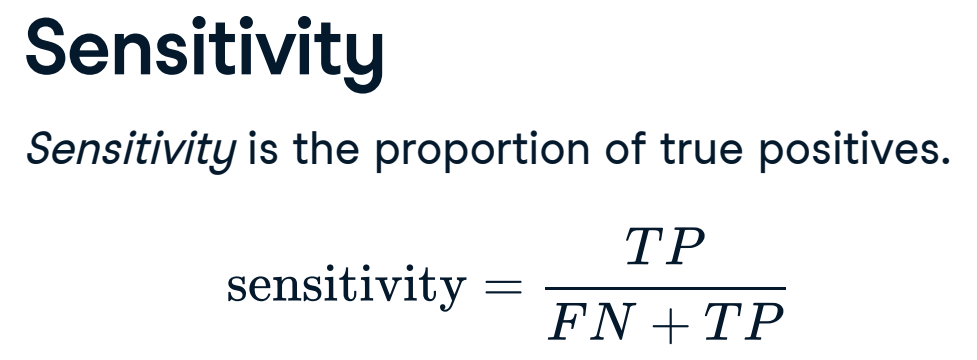

In [ ]:
sensitivity = TP/(FN + TP)
sensitivity

0.445

## **Specifity**

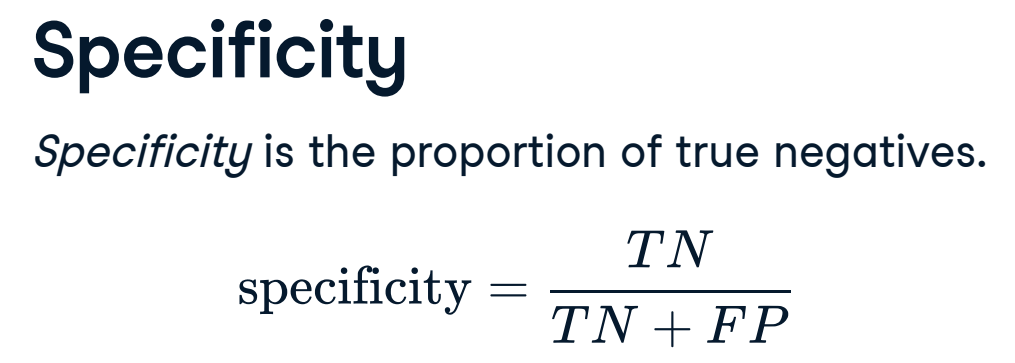

In [ ]:
specificity = TN/(TN + FP)
specificity

0.705

## **Multi Linear Regression**

In [ ]:
fishes = pd.read_csv('/content/Fish_Dataset.csv')
fishes

,Species,Mass (g),Length (cm),Height (cm)
0,Roach,119.7,23.3,6.9
1,Bream,291.3,22.5,12.5
2,Smelt,18.7,11.8,5.0
3,Perch,317.9,21.7,13.3
4,Bream,324.3,34.5,13.4
...,...,...,...,...
495,Bream,209.3,33.4,13.5
496,Pike,1373.9,43.6,19.5
497,Perch,546.2,39.1,11.4
498,Smelt,9.0,7.2,4.1


In [ ]:
fishes.columns

Index(['Species', 'Mass (g)', 'Length (cm)', 'Height (cm)'], dtype='object')

In [ ]:
fishes.rename(columns={'Mass (g)': 'Mass', 'Length (cm)': 'Length', 'Height (cm)': 'Height'}, inplace=True)

<Axes: xlabel='Length', ylabel='Height'>

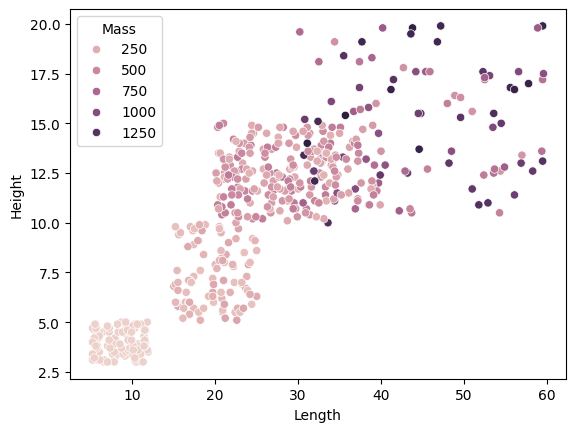

In [ ]:
sns.scatterplot(x= 'Length', y = 'Height', hue = 'Mass', data = fishes)

In [ ]:
import statsmodels.formula.api as smf

model_mass_vs_both = ols('Mass ~ Length + Height', data = fishes).fit()
model_mass_vs_both.params

,0
Intercept,-241.893687
Length,15.292796
Height,21.872003


In [ ]:
from itertools import product

lenght_cm = np.arange(5, 61, 5)
height_cm = np.arange(2, 21, 2)


explanatory_data = pd.DataFrame([
    {"lenght_cm": l, "height_cm": h} for l in lenght_cm for h in height_cm
])
explanatory_data

,lenght_cm,height_cm
0,5,2
1,5,4
2,5,6
3,5,8
4,5,10
...,...,...
115,60,12
116,60,14
117,60,16
118,60,18


In [ ]:
import statsmodels.formula.api as smf

lenght_cm = np.arange(5, 61, 5)
height_cm = np.arange(2, 21, 2)

explanatory_data = pd.DataFrame([
    {"lenght_cm": l, "height_cm": h} for l in lenght_cm for h in height_cm
])

# Rename columns to match the model formula
explanatory_data = explanatory_data.rename(columns={'lenght_cm': 'Length', 'height_cm': 'Height'})

# Now predict using the updated explanatory_data
prediction_data = model_mass_vs_both.predict(explanatory_data)
prediction_data

,0
0,-121.685703
1,-77.941697
2,-34.197691
3,9.546314
4,53.290320
...,...
115,938.138094
116,981.882099
117,1025.626105
118,1069.370111


In [ ]:
prediction_data = explanatory_data.assign(mass_g = model_mass_vs_both.predict(explanatory_data))
prediction_data

,Length,Height,mass_g
0,5,2,-121.685703
1,5,4,-77.941697
2,5,6,-34.197691
3,5,8,9.546314
4,5,10,53.290320
...,...,...,...
115,60,12,938.138094
116,60,14,981.882099
117,60,16,1025.626105
118,60,18,1069.370111


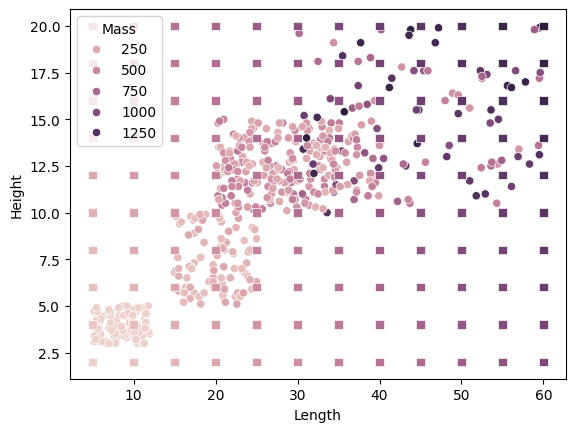

In [ ]:
sns.scatterplot(x= 'Length', y = 'Height', hue = 'Mass', data = fishes)
sns.scatterplot(x= 'Length', y = 'Height', hue = 'mass_g', data = prediction_data, marker = 's', legend = False)
plt.show()

In [ ]:
fishes.columns

Index(['Species', 'Mass', 'Length', 'Height'], dtype='object')

In [ ]:
bank_data

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
...,...,...,...
395,1,1.077655,0.878567
396,1,-1.273770,-0.869016
397,1,-0.426195,0.684666
398,1,0.818836,1.428091


In [ ]:
confusion_matrix

array([[141.,  59.],
       [111.,  89.]])

In [ ]:
logit('response ~ explanatory variable', data = dataset ).fit()
logit('response ~ explanatory vairble1 + explanatory variable2', data = datset).fit()
logit('response ~ explanatory vairble1 * explanatory variable2', data = datset).fit()

NameError: name 'dataset' is not defined

## **Gaussian Probability Density Function**

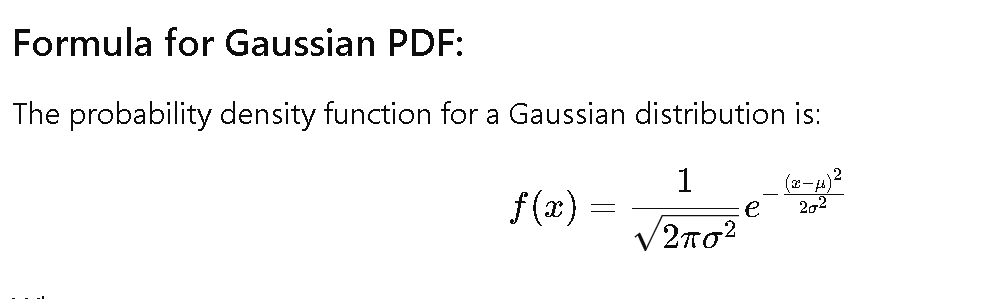

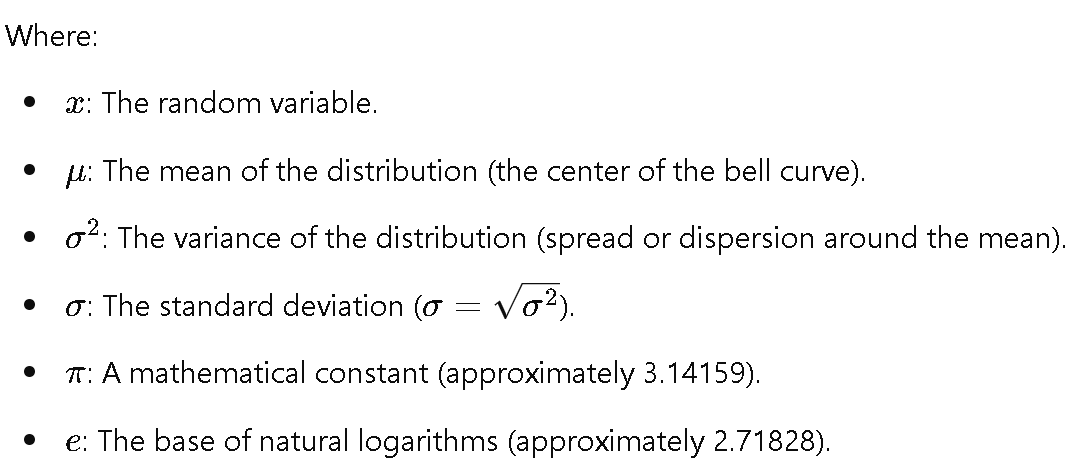

- Mean = 170 cm
- Standard Deviation = 10 cm

x = 180 cm

0.02

In [ ]:
from scipy.stats import norm

mu = 170
sigma = 10

x = 180
pdf_value = norm.pdf(x, loc = mu, scale = sigma)
print(pdf_value)

0.024197072451914336


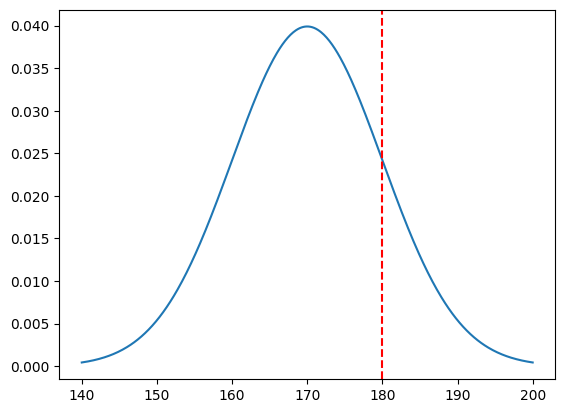

In [ ]:
x_values = np.linspace(140 , 200, 500)
y_values = norm.pdf(x_values, loc = mu, scale = sigma)
plt.plot(x_values, y_values, label = 'Gaussian PDF')
plt.axvline(x = x, color = 'red', linestyle = '--', label =f'x={x}' )

## **Cummulative Density Function**

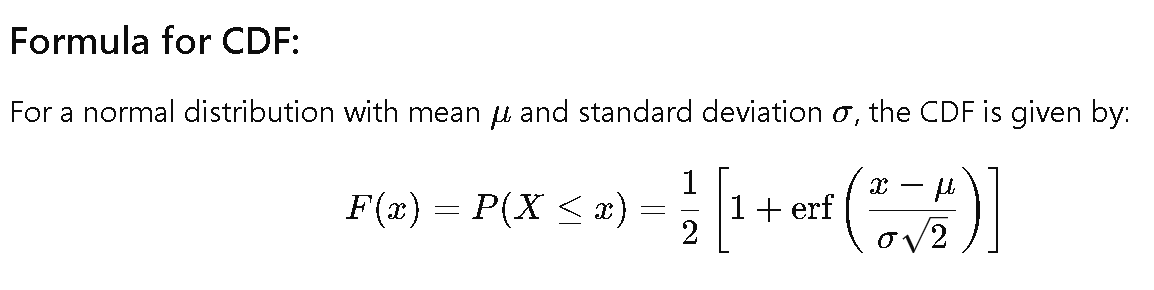

In [ ]:
mu = 170
sigma = 10

x = 180

cdf = norm.cdf(x, loc =  mu, scale = sigma)
print(cdf)

0.8413447460685429


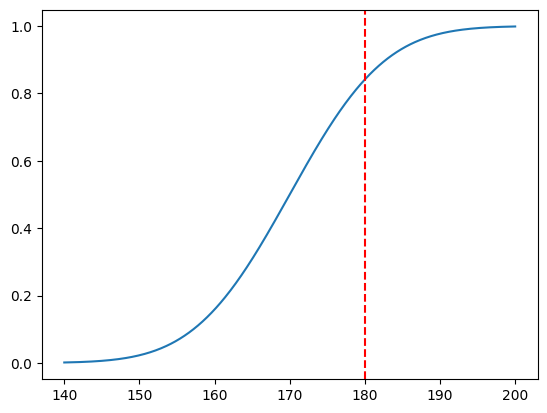

In [ ]:
x_values = np.linspace(140, 200, 500)
y_values = norm.cdf(x_values, loc=mu, scale=sigma)

plt.plot(x_values, y_values, label='Gaussian CDF')
plt.axvline(x=x, color='red', linestyle='--', label=f'x = {x}')

## **Logistic Probability Density Function**

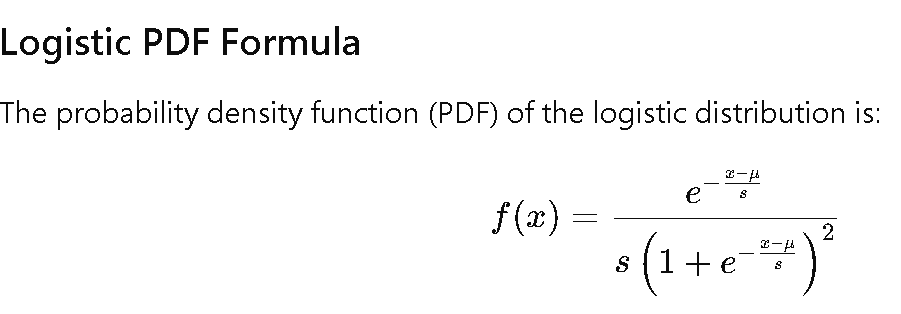

## Reaction Times

- Mean reaction time (𝜇) = 1 second
- Scale parameter (𝑠) = 0.2 seconds (reflecting variability in reaction times)

In [ ]:
from scipy.stats import logistic

mu = 1
scale = 0.2

x_values = np.linspace(0, 2, 500)

pdf_value = logistic.pdf(x_values, loc = mu, scale = scale)
pdf_value

array([0.03324028, 0.03390395, 0.03458069, 0.03527073, 0.03597434,
       0.03669178, 0.0374233 , 0.03816917, 0.03892968, 0.03970509,
       0.04049568, 0.04130175, 0.04212358, 0.04296148, 0.04381574,
       0.04468667, 0.04557459, 0.0464798 , 0.04740265, 0.04834345,
       0.04930254, 0.05028025, 0.05127695, 0.05229297, 0.05332867,
       0.05438442, 0.05546058, 0.05655754, 0.05767567, 0.05881536,
       0.05997701, 0.061161  , 0.06236776, 0.06359769, 0.06485122,
       0.06612876, 0.06743075, 0.06875764, 0.07010985, 0.07148786,
       0.07289212, 0.07432308, 0.07578124, 0.07726706, 0.07878104,
       0.08032366, 0.08189544, 0.08349687, 0.08512847, 0.08679078,
       0.0884843 , 0.0902096 , 0.09196719, 0.09375765, 0.09558153,
       0.09743939, 0.0993318 , 0.10125936, 0.10322263, 0.10522223,
       0.10725876, 0.10933281, 0.11144501, 0.11359599, 0.11578637,
       0.11801678, 0.12028788, 0.12260032, 0.12495475, 0.12735184,
       0.12979226, 0.13227669, 0.1348058 , 0.1373803 , 0.14000

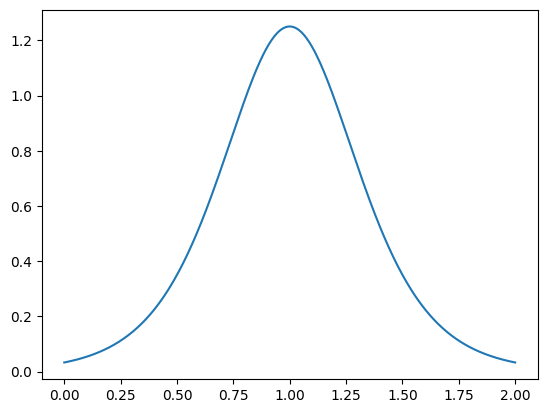

In [ ]:
plt.plot(x_values, pdf_value, label="Reaction Time PDF")